In [1]:
import matplotlib.pyplot as plt

In [2]:
# reload packages
%load_ext autoreload
%autoreload 2

### Choose GPU (this may not be needed on your computer)

In [3]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=''

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=''


### load packages

In [4]:
from tfumap.umap import tfUMAP

/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/tfumap/umap.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
import umap
import pandas as pd

### Load dataset

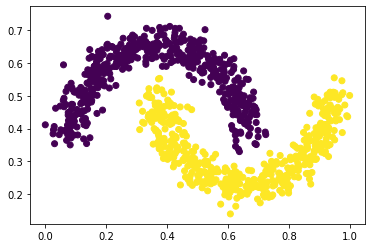

In [6]:
from sklearn.datasets import make_moons

X_train, Y_train = make_moons(1000, random_state=0, noise=0.1)

X_test, Y_test = make_moons(1000, random_state=1, noise=0.1)

X_valid, Y_valid = make_moons(1000, random_state=2, noise=0.1)

def norm(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

X_train = norm(X_train)
X_valid = norm(X_valid)
X_test = norm(X_test)
X_train_flat = X_train

X_test_flat = X_test


plt.scatter(X_test[:,0], X_test[:,1], c=Y_test)

### Create model and train

In [7]:
import phate

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

X_scaled = MinMaxScaler().fit_transform(X_train_flat)

In [9]:
phate_op = phate.PHATE(n_jobs=-1)
data_phate = phate_op.fit_transform(X_scaled)

Calculating PHATE...
  Running PHATE on 1000 observations and 2 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.11 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.13 seconds.
  Calculating optimal t...
    Automatically selected t = 23
  Calculated optimal t in 0.25 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.11 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.83 seconds.
Calculated PHATE in 1.34 seconds.


In [10]:
z = data_phate

In [11]:
z.shape

(1000, 2)

### Plot model output

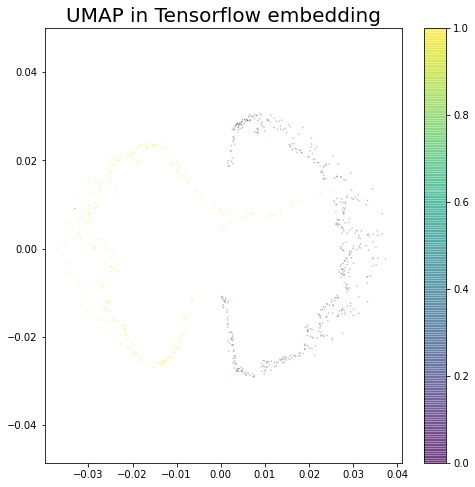

In [12]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    z[:, 0],
    z[:, 1],
    c=Y_train[:len(z)],
    cmap="viridis",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("UMAP in Tensorflow embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### Save output

In [13]:
from tfumap.paths import ensure_dir, MODEL_DIR

In [14]:
output_dir = MODEL_DIR/'projections'/ 'moons' / 'phate'
ensure_dir(output_dir)

In [15]:
np.save(output_dir / 'z.npy', z)